# APS1 - Redes Sociais

### Bruno Freitas do Nascimento Rodrigues e Nicolas Byung Kwan Cho

O dataset escolhido baseia-se no jogo [Wikispeedia](https://dlab.epfl.ch/wikispeedia/play/). No jogo, começamos em determinado artigo da [Wikipedia](https://pt.wikipedia.org/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal) e temos o objetivo de chegar em outro artigo destino apenas navegando entre os links disponíveis em cada página.

O dataset apresenta dois arquivos tsv: um listando todos os artigos selecionados e outro definindo o direcionamento entre artigos.

## Importando bibliotecas e criando grafo

In [4]:
import netpixi
import csv
import urllib.parse
from netpixi.integration.gt import Graph

Como um link de um artigo direciona o jogador para outro artigo, mas não necessariamente o contrário, o grafo será dirigido

In [5]:
g = Graph(directed=True) # dirigido

In [6]:
with open("articles.tsv", 'r', encoding='utf-8') as file:
    # leitura do tsv
    tsv_file = csv.reader(file, delimiter="\t")
    
    # pular linhas iniciais
    for i in range(12):
        file, next(file)

    # criar vértices
    for line in tsv_file:
        g.add_vertex(urllib.parse.unquote(line[0]))

In [7]:
print('número de vértices de g:', g.num_vertices())

número de vértices de g: 4604


In [8]:
with open("links.tsv", 'r', encoding='utf-8') as file:
    tsv_file = csv.reader(file, delimiter="\t")
    
    for i in range(12):
        file, next(file)

    # criar arestas (artigos que direcionam a si mesmo não definirão uma nova aresta)
    for line in tsv_file:
        rem = urllib.parse.unquote(line[0])
        dest = urllib.parse.unquote(line[1])
        if rem!=dest:
            g.add_edge(rem,dest)

In [9]:
print('número de arestas de g:', g.num_edges())

número de arestas de g: 119772


In [10]:
import seaborn
from netpixi.integration.gt import *
from regression.integration.gt import *

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setupt

In [11]:
n = g.num_vertices()
m = g.num_edges()
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

21192212

In [12]:
d = m / max_edges
d

0.005651698841064821

In [13]:
data = gt_data(g)
data

""
id
Áedán_mac_Gabráin
Åland
Édouard_Manet
Éire
Óengus_I_of_the_Picts
...
Zionism
Zirconium
Zoroaster


In [14]:
in_degrees = []
for v in g.all_vertices():
    in_degrees.append(v.in_degree())

out_degrees = []
for v in g.all_vertices():
    out_degrees.append(v.out_degree())

degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

In [15]:
data['in_degree'] = in_degrees
data['out_degree'] = out_degrees
data['degree'] = degrees
data

,in_degree,out_degree,degree
id,,,
Áedán_mac_Gabráin,0,11,11
Åland,0,19,19
Édouard_Manet,0,20,20
Éire,0,8,8
Óengus_I_of_the_Picts,0,10,10
...,...,...,...
Zionism,25,74,99
Zirconium,15,42,57
Zoroaster,9,28,37


count    4604.000000
mean       26.014770
std        62.741796
min         0.000000
25%         2.000000
50%         8.000000
75%        25.000000
max      1551.000000
Name: in_degree, dtype: float64

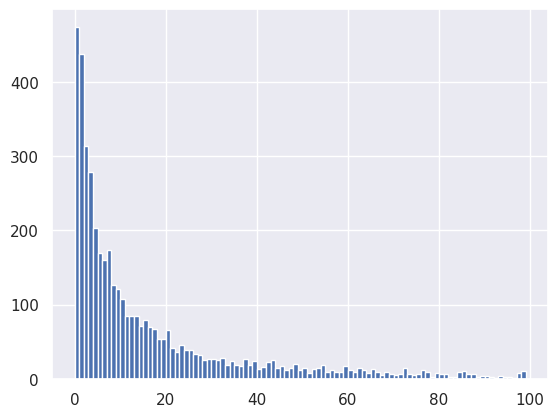

In [16]:
data['in_degree'].hist(bins=range(100))
data['in_degree'].describe()

count    4604.000000
mean       52.029540
std        78.539943
min         0.000000
25%        16.000000
50%        30.000000
75%        59.000000
max      1845.000000
Name: degree, dtype: float64

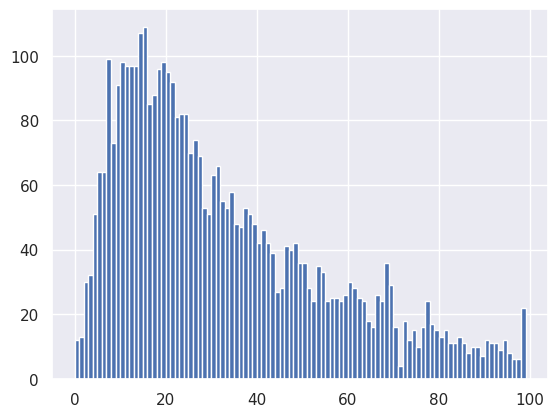

In [17]:
data['degree'].hist(bins=range(100))
data['degree'].describe()

count    4604.000000
mean       26.014770
std        24.195341
min         0.000000
25%        11.000000
50%        19.000000
75%        33.000000
max       294.000000
Name: out_degree, dtype: float64

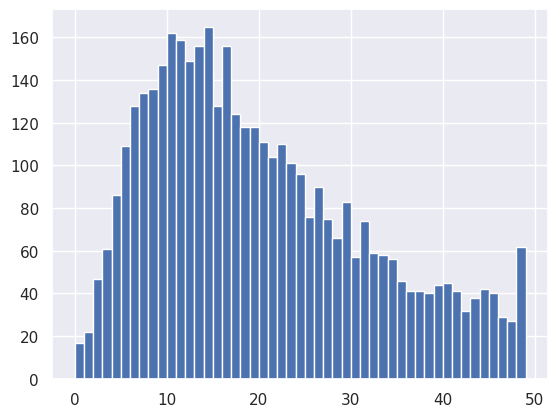

In [18]:
data['out_degree'].hist(bins=range(50))
data['out_degree'].describe()

### TESTE

In [19]:
from netpixi.integration.gt import *

In [20]:
gt_save(g, 'teste.net.gz')


In [21]:
g = gt_load('teste.net.gz')
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'exemplo.net.gz')

In [26]:
r = netpixi.render('exemplo.net.gz', infinite=True);

In [25]:
# mudar a cor de fundo do grafo
r.graph(color=0x000000)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0xfaff00, size=15)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0xffffff, width=1, curve1=0, curve2=0)


r.vertex_set_key('id')